<a href="https://colab.research.google.com/github/HromovAndrey/II_mood_3_part_4/blob/Practika/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Дані про продаж будинків

In [126]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/AmesHousing.csv",
                 index_col=0)

# Завдання 1
Виведіть основіні числові характеристики, кількість пропущенних значень для кожного стовпчика

In [127]:
df.describe()
missing_value = df.isnull().sum()
missing_value

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

# Завдання 2
Розділіть дані на тестові та тренувальні(цільова ознака `SalePrice`)

In [128]:
y = df['SalePrice']
X = df.drop(columns='SalePrice')

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


# Завдання 3
Створіть препроцесор для заповнення пропусків та натренуйте його

In [130]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [131]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [132]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [133]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

In [134]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Завдання 4
Створіть модель та натренуйте її

In [135]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

LinearRegression()

# Завдання 5
Виведіть метрики, важливість онак та графік метрик на тренувальних та тестових даних

In [136]:
y_train_pred = model.predict(X_train_preprocessed)
y_test_pred = model.predict(X_test_preprocessed)

In [137]:
def get_metrics(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

In [138]:
train_metrics = get_metrics(y_train, y_train_pred)
test_metrics = get_metrics(y_test, y_test_pred)

In [139]:
feature_importance = np.abs(model.coef_)
feature_names = numeric_features.tolist() + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()


In [140]:
print("Train metrics:", train_metrics)
print("Test metrics:", test_metrics)

Train metrics: {'MSE': 2011267594.6136703, 'R2': 0.6617295959904115}
Test metrics: {'MSE': 2108351055.1018367, 'R2': 0.7370329341001987}


In [141]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [142]:
importance_df.head(10)

,Feature,Importance
16,Gr Liv Area,52.825683
12,Total Bsmt SF,37.802454
13,1st Flr SF,32.645299
9,BsmtFin SF 1,27.325559
14,2nd Flr SF,20.250407
27,Garage Area,19.419130
8,Mas Vnr Area,11.860297
11,Bsmt Unf SF,10.520791
28,Wood Deck SF,6.031264
34,Misc Val,4.405651


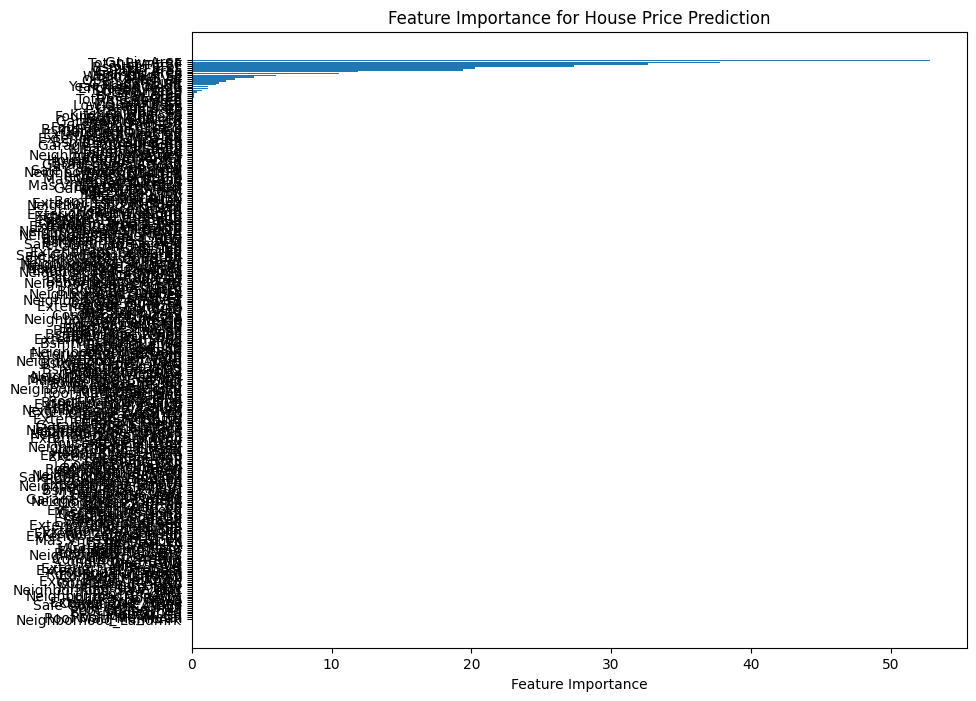

In [143]:
plt.figure(figsize=(10,8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for House Price Prediction')
plt.gca().invert_yaxis()
plt.show()

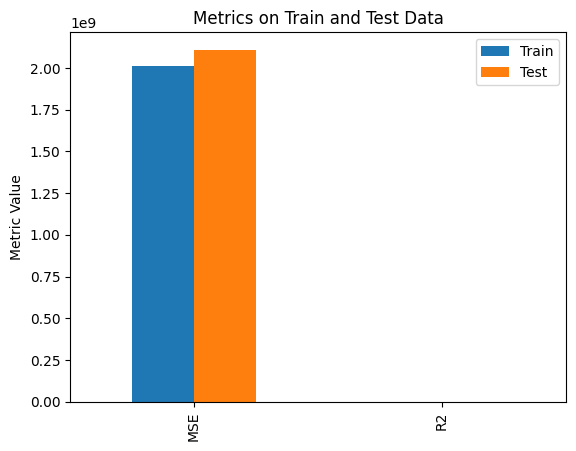

In [144]:
metrics_df = pd.DataFrame({'Train': train_metrics.values(), 'Test': test_metrics.values()}, index=train_metrics.keys())
metrics_df.plot(kind='bar')
plt.title('Metrics on Train and Test Data')
plt.ylabel('Metric Value')
plt.show()

# Завдання 6
Об'єднайте препроцесор та натреновану модель і збережіть її

In [145]:
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', model)])

In [146]:
joblib.dump(final_model, 'house_price_model.pkl')

['house_price_model.pkl']

In [147]:
loaded_model = joblib.load('house_price_model.pkl')

In [148]:
example_data = X_test.iloc[:5, :]
example_pred = loaded_model.predict(example_data)

In [149]:
print("Predictions:", example_pred)
print("Actual prices:", y_test.iloc[:5].values)

Predictions: [144106.59697345 113788.62221627 168099.04989336 120672.8677034
 107798.90228576]
Actual prices: [161000 116000 196500 123600 126000]
